In [1]:
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
import numpy as np
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('AMD')


randomImage = np.random.random((1024,1960))

def selectMatrix(matrixNum=1, scale=0.5) :
    if (matrixNum == 1):
        return np.asarray([
            [scale , 0, 0],
            [0, scale, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 2):
        return np.asarray([
            [0.70710677 , 0.70710677, 0],
            [-0.70710677, 0.70710677, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 3):
        s=0.5
        matrix = np.asarray([
            [scale , 0, 0, 0],
            [0, scale, 0, 0],
            [0, 0, scale, 0],
            [0, 0, 0, 1]
        ])

c:\Users\hkalo\miniconda3\envs\hpp\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


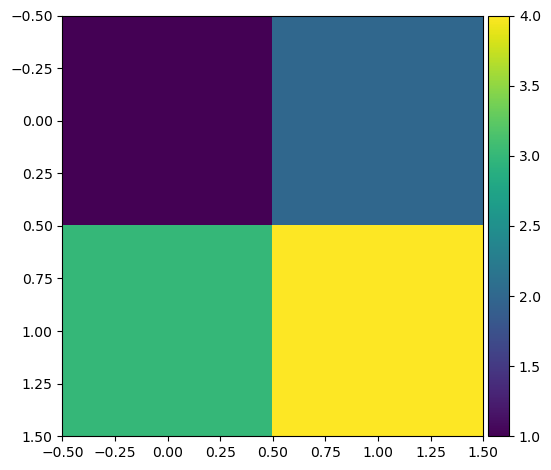

In [2]:
# Create image
image = np.asarray([[1,2],[3,4]])
imshow(image)

Executing affine_transform_2d_x.cl


cl.OCLArray([[1.03     , 1.05     , 1.0699999, 1.09     , 1.11     , 2.02     ,
        2.02     , 2.02     , 2.02     , 2.02     ],
       [1.0699999, 1.0899999, 1.1099999, 1.13     , 1.15     , 2.06     ,
        2.06     , 2.06     , 2.06     , 2.06     ],
       [1.11     , 1.13     , 1.15     , 1.1700001, 1.19     , 2.1      ,
        2.1      , 2.1      , 2.1      , 2.1      ],
       [1.15     , 1.17     , 1.1899999, 1.21     , 1.23     , 2.14     ,
        2.14     , 2.14     , 2.14     , 2.14     ],
       [1.19     , 1.21     , 1.23     , 1.25     , 1.27     , 2.18     ,
        2.18     , 2.18     , 2.18     , 2.18     ],
       [3.01     , 3.03     , 3.05     , 3.07     , 3.09     , 4.       ,
        4.       , 4.       , 4.       , 4.       ],
       [3.01     , 3.03     , 3.05     , 3.07     , 3.09     , 4.       ,
        4.       , 4.       , 4.       , 4.       ],
       [3.01     , 3.03     , 3.05     , 3.07     , 3.09     , 4.       ,
        4.       , 4.       , 4.       , 4.       ],
       [3.01     , 3.03     , 3.05     , 3.07     , 3.09     , 4.       ,
        4.       , 4.       , 4.       , 4.       ],
       [3.01     , 3.03     , 3.05     , 3.07     , 3.09     , 4.       ,
        4.       , 4.       , 4.       , 4.       ]], dtype=float32)
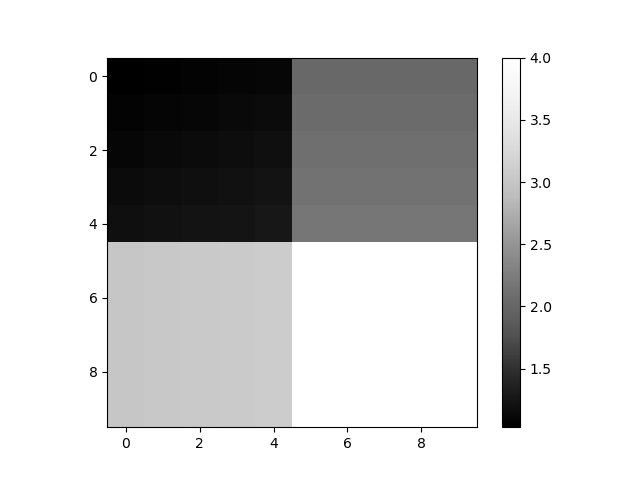
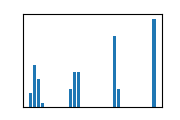

In [3]:
# Transform with scale 5
matrix = selectMatrix(1,5)
result1 = cle.create((10,10))
cle.affine_transform(image, result1, transform = matrix)
result1

Executing affine_transform_2d_interpolate_x.cl


cl.OCLArray([[0.36187744, 0.48171997, 0.6015625 , 0.721405  , 0.84124756,
        0.96343994, 1.0832825 , 1.203125  , 0.96343994, 0.7237549 ],
       [0.48171997, 0.6412506 , 0.80078125, 0.9603119 , 1.1198425 ,
        1.2825012 , 1.4420319 , 1.6015625 , 1.2825012 , 0.96343994],
       [0.6015625 , 0.80078125, 1.        , 1.1992188 , 1.3984375 ,
        1.6015625 , 1.8007812 , 2.        , 1.6015625 , 1.203125  ],
       [0.84124756, 1.1198425 , 1.3984375 , 1.5976562 , 1.796875  ,
        2.        , 2.1992188 , 2.3984375 , 1.9206238 , 1.44281   ],
       [1.0809326 , 1.4389038 , 1.796875  , 1.9960938 , 2.1953125 ,
        2.3984375 , 2.5976562 , 2.796875  , 2.239685  , 1.6824951 ],
       [1.3253174 , 1.7642212 , 2.203125  , 2.4023438 , 2.6015625 ,
        2.8046875 , 3.0039062 , 3.203125  , 2.5650024 , 1.9268799 ],
       [1.5650024 , 2.0832825 , 2.6015625 , 2.8007812 , 3.        ,
        3.203125  , 3.4023438 , 3.6015625 , 2.8840637 , 2.166565  ],
       [1.8046875 , 2.4023438 , 3.        , 3.1992188 , 3.3984375 ,
        3.6015625 , 3.8007812 , 4.        , 3.203125  , 2.40625   ],
       [1.4451599 , 1.9237518 , 2.4023438 , 2.5618744 , 2.721405  ,
        2.8840637 , 3.0435944 , 3.203125  , 2.5650024 , 1.9268799 ],
       [1.0856323 , 1.4451599 , 1.8046875 , 1.92453   , 2.0443726 ,
        2.166565  , 2.2864075 , 2.40625   , 1.9268799 , 1.4475098 ]],
      dtype=float32)
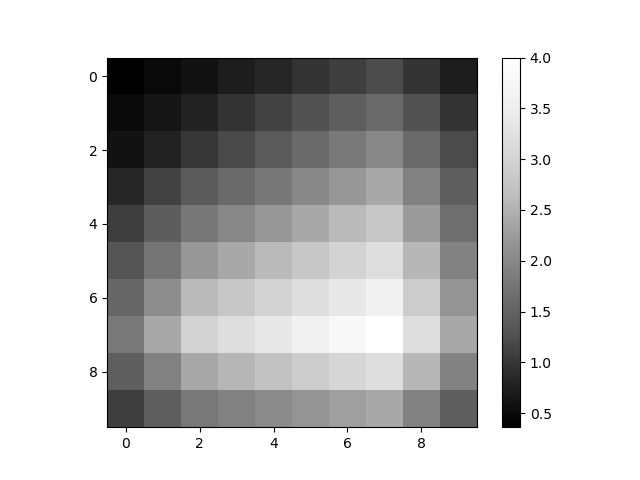
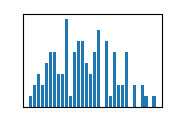

In [4]:
# Transform with scale 5
matrix = selectMatrix(1,5)
result2 = cle.create((10,10))
cle.affine_transform(image, result2, transform = matrix, linear_interpolation=True)
result2


Executing affine_transform_2d_x.cl


cl.OCLArray([[1.0075   , 1.0125   , 1.0175   , 1.0225   , 1.0275   , 1.0325   ,
        1.0375   , 1.0425   , 1.0475   , 1.0525   , 2.005    , 2.005    ,
        2.005    , 2.005    , 2.005    , 2.005    , 2.005    , 2.005    ,
        2.005    , 2.005    ],
       [1.0175   , 1.0225   , 1.0275   , 1.0325   , 1.0375   , 1.0425   ,
        1.0475   , 1.0525   , 1.0575   , 1.0625   , 2.015    , 2.015    ,
        2.015    , 2.015    , 2.015    , 2.015    , 2.015    , 2.015    ,
        2.015    , 2.015    ],
       [1.0275   , 1.0325   , 1.0375   , 1.0425   , 1.0475   , 1.0525   ,
        1.0575   , 1.0625   , 1.0675   , 1.0725   , 2.025    , 2.025    ,
        2.025    , 2.025    , 2.025    , 2.025    , 2.025    , 2.025    ,
        2.025    , 2.025    ],
       [1.0375   , 1.0425   , 1.0475   , 1.0525   , 1.0575   , 1.0625   ,
        1.0675   , 1.0725   , 1.0775   , 1.0825   , 2.035    , 2.035    ,
        2.035    , 2.035    , 2.035    , 2.035    , 2.035    , 2.035    ,
        2.035    , 2.035    ],
       [1.0475   , 1.0525   , 1.0575   , 1.0625   , 1.0675   , 1.0725   ,
        1.0775   , 1.0825   , 1.0875   , 1.0925   , 2.045    , 2.045    ,
        2.045    , 2.045    , 2.045    , 2.045    , 2.045    , 2.045    ,
        2.045    , 2.045    ],
       [1.0575   , 1.0625   , 1.0675   , 1.0725   , 1.0775   , 1.0825   ,
        1.0875   , 1.0925   , 1.0975   , 1.1025   , 2.055    , 2.055    ,
        2.055    , 2.055    , 2.055    , 2.055    , 2.055    , 2.055    ,
        2.055    , 2.055    ],
       [1.0675001, 1.0725001, 1.0775001, 1.0825001, 1.0875001, 1.0925001,
        1.0975001, 1.1025001, 1.1075001, 1.1125001, 2.065    , 2.065    ,
        2.065    , 2.065    , 2.065    , 2.065    , 2.065    , 2.065    ,
        2.065    , 2.065    ],
       [1.0775001, 1.0825001, 1.0875001, 1.0925001, 1.0975001, 1.1025001,
        1.1075001, 1.1125001, 1.1175001, 1.1225001, 2.075    , 2.075    ,
        2.075    , 2.075    , 2.075    , 2.075    , 2.075    , 2.075    ,
        2.075    , 2.075    ],
       [1.0875001, 1.0925001, 1.0975001, 1.1025001, 1.1075001, 1.1125001,
        1.1175001, 1.1225001, 1.1275   , 1.1325   , 2.085    , 2.085    ,
        2.085    , 2.085    , 2.085    , 2.085    , 2.085    , 2.085    ,
        2.085    , 2.085    ],
       [1.0975001, 1.1025001, 1.1075001, 1.1125001, 1.1175001, 1.1225001,
        1.1275   , 1.1325   , 1.1375   , 1.1425   , 2.095    , 2.095    ,
        2.095    , 2.095    , 2.095    , 2.095    , 2.095    , 2.095    ,
        2.095    , 2.095    ],
       [3.0025   , 3.0075   , 3.0125   , 3.0175   , 3.0225   , 3.0275   ,
        3.0325   , 3.0375   , 3.0425   , 3.0475   , 4.       , 4.       ,
        4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
        4.       , 4.       ],
       [3.0025   , 3.0075   , 3.0125   , 3.0175   , 3.0225   , 3.0275   ,
        3.0325   , 3.0375   , 3.0425   , 3.0475   , 4.       , 4.       ,
        4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
        4.       , 4.       ],
       [3.0025   , 3.0075   , 3.0125   , 3.0175   , 3.0225   , 3.0275   ,
        3.0325   , 3.0375   , 3.0425   , 3.0475   , 4.       , 4.       ,
        4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
        4.       , 4.       ],
       [3.0025   , 3.0075   , 3.0125   , 3.0175   , 3.0225   , 3.0275   ,
        3.0325   , 3.0375   , 3.0425   , 3.0475   , 4.       , 4.       ,
        4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
        4.       , 4.       ],
       [3.0025   , 3.0075   , 3.0125   , 3.0175   , 3.0225   , 3.0275   ,
        3.0325   , 3.0375   , 3.0425   , 3.0475   , 4.       , 4.       ,
        4.       , 4.       , 4.       , 4.       , 4.       , 4.       ,
        4.       , 4.       ],
       [3.0025   , 3.0075   , 3.0125   , 3.0175   , 3.0225   , 3.0275   ,
        3.0325   , 3.0375   , 3.0425   , 3.0475   , 4.       , 4.       ,
        4.       , 4.       , 4.       , 4.       ,
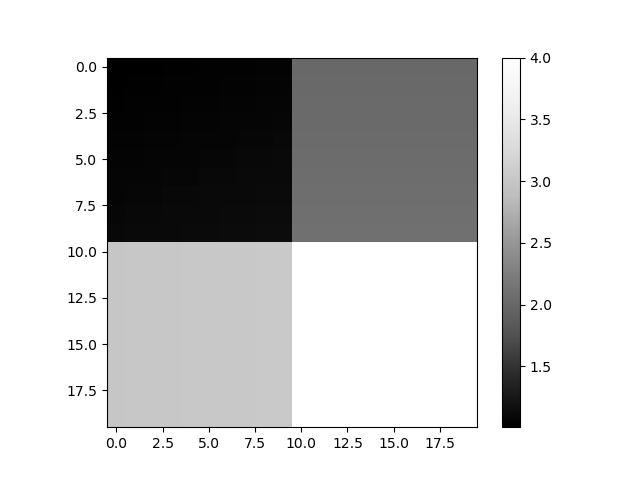
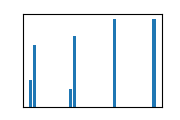

In [5]:
# Transform with scale 10
matrix = selectMatrix(1,10)
result3 = cle.create((20,20))
cle.affine_transform(image, result3, transform = matrix)
result3

Executing affine_transform_2d_interpolate_x.cl


cl.OCLArray([[0.30336   , 0.35714722, 0.41308594, 0.46902466, 0.5228119 ,
        0.5787506 , 0.63253784, 0.68847656, 0.7444153 , 0.7982025 ,
        0.85414124, 0.90792847, 0.9638672 , 1.0198059 , 1.0735931 ,
        1.0456238 , 0.9380493 , 0.8261719 , 0.71429443, 0.60672   ],
       [0.35714722, 0.4204712 , 0.48632812, 0.55218506, 0.61550903,
        0.68136597, 0.74468994, 0.8105469 , 0.8764038 , 0.9397278 ,
        1.0055847 , 1.0689087 , 1.1347656 , 1.2006226 , 1.2639465 ,
        1.2310181 , 1.1043701 , 0.97265625, 0.8409424 , 0.71429443],
       [0.41308594, 0.48632812, 0.5625    , 0.6386719 , 0.71191406,
        0.78808594, 0.8613281 , 0.9375    , 1.0136719 , 1.0869141 ,
        1.1630859 , 1.2363281 , 1.3125    , 1.3886719 , 1.4619141 ,
        1.4238281 , 1.2773438 , 1.125     , 0.97265625, 0.8261719 ],
       [0.46902466, 0.55218506, 0.6386719 , 0.7251587 , 0.8083191 ,
        0.8948059 , 0.9779663 , 1.0644531 , 1.15094   , 1.2341003 ,
        1.3205872 , 1.4037476 , 1.4902344 , 1.5767212 , 1.6598816 ,
        1.6166382 , 1.4503174 , 1.2773438 , 1.1043701 , 0.9380493 ],
       [0.5228119 , 0.61550903, 0.71191406, 0.8083191 , 0.90101624,
        0.99742126, 1.0901184 , 1.1865234 , 1.2829285 , 1.3756256 ,
        1.4720306 , 1.5647278 , 1.6611328 , 1.7575378 , 1.850235  ,
        1.8020325 , 1.6166382 , 1.4238281 , 1.2310181 , 1.0456238 ],
       [0.60672   , 0.71429443, 0.8261719 , 0.9380493 , 1.0456238 ,
        1.1523438 , 1.25      , 1.3515625 , 1.453125  , 1.5507812 ,
        1.6523438 , 1.75      , 1.8515625 , 1.953125  , 2.0507812 ,
        1.9948425 , 1.7896118 , 1.5761719 , 1.3627319 , 1.1575012 ],
       [0.71429443, 0.8409424 , 0.97265625, 1.1043701 , 1.2310181 ,
        1.3476562 , 1.4453125 , 1.546875  , 1.6484375 , 1.7460938 ,
        1.8476562 , 1.9453125 , 2.046875  , 2.1484375 , 2.2460938 ,
        2.1802368 , 1.9559326 , 1.7226562 , 1.4893799 , 1.2650757 ],
       [0.8261719 , 0.97265625, 1.125     , 1.2773438 , 1.4238281 ,
        1.5507812 , 1.6484375 , 1.75      , 1.8515625 , 1.9492188 ,
        2.0507812 , 2.1484375 , 2.25      , 2.3515625 , 2.4492188 ,
        2.3730469 , 2.1289062 , 1.875     , 1.6210938 , 1.3769531 ],
       [0.9380493 , 1.1043701 , 1.2773438 , 1.4503174 , 1.6166382 ,
        1.7539062 , 1.8515625 , 1.953125  , 2.0546875 , 2.1523438 ,
        2.2539062 , 2.3515625 , 2.453125  , 2.5546875 , 2.6523438 ,
        2.565857  , 2.30188   , 2.0273438 , 1.7528076 , 1.4888306 ],
       [1.0456238 , 1.2310181 , 1.4238281 , 1.6166382 , 1.8020325 ,
        1.9492188 , 2.046875  , 2.1484375 , 2.25      , 2.3476562 ,
        2.4492188 , 2.546875  , 2.6484375 , 2.75      , 2.8476562 ,
        2.7512512 , 2.4682007 , 2.1738281 , 1.8794556 , 1.596405  ],
       [1.1575012 , 1.3627319 , 1.5761719 , 1.7896118 , 1.9948425 ,
        2.1523438 , 2.25      , 2.3515625 , 2.453125  , 2.5507812 ,
        2.6523438 , 2.75      , 2.8515625 , 2.953125  , 3.0507812 ,
        2.9440613 , 2.6411743 , 2.3261719 , 2.0111694 , 1.7082825 ],
       [1.2650757 , 1.4893799 , 1.7226562 , 1.9559326 , 2.1802368 ,
        2.3476562 , 2.4453125 , 2.546875  , 2.6484375 , 2.7460938 ,
        2.8476562 , 2.9453125 , 3.046875  , 3.1484375 , 3.2460938 ,
        3.1294556 , 2.807495  , 2.4726562 , 2.1378174 , 1.8158569 ],
       [1.3769531 , 1.6210938 , 1.875     , 2.1289062 , 2.3730469 ,
        2.5507812 , 2.6484375 , 2.75      , 2.8515625 , 2.9492188 ,
        3.0507812 , 3.1484375 , 3.25      , 3.3515625 , 3.4492188 ,
        3.3222656 , 2.9804688 , 2.625     , 2.2695312 , 1.9277344 ],
       [1.4888306 , 1.7528076 , 2.0273438 , 2.30188   , 2.565857  ,
        2.7539062 , 2.8515625 , 2.953125  , 3.0546875 , 3.1523438 ,
        3.2539062 , 3.3515625 , 3.453125  , 3.5546875 , 3.6523438 ,
        3.5150757 , 3.1534424 , 2.7773438 , 2.401245  , 2.0396118 ],
       [1.596405  , 1.8794556 , 2.1738281 , 2.4682007 , 2.7512512 ,
        2.9492188 , 3.046875  , 3.1484375 , 3.25      , 3.3476562 ,
        3.4492188 , 3.546875  , 3.64
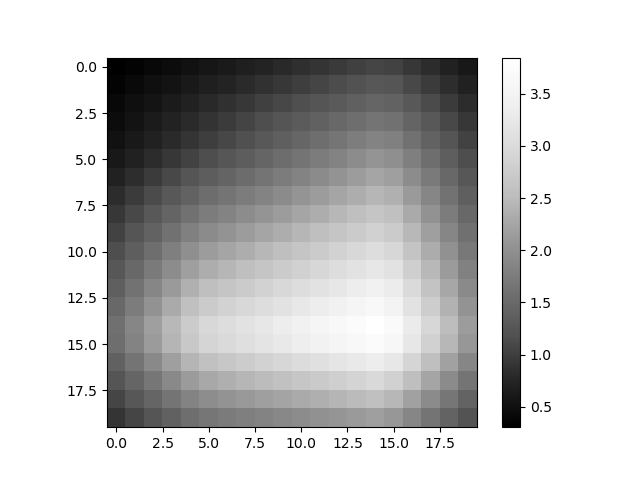
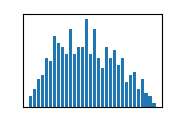

In [6]:
# Transform with scale 10
matrix = selectMatrix(1,10)
result4 = cle.create((20,20))
cle.affine_transform(image, result4, transform = matrix, linear_interpolation=True)
result4

In [7]:
# Rotate with 45
matrix = selectMatrix(2)
rotRes1=cle.affine_transform(result2, transform=matrix)

Executing affine_transform_2d_x.cl


In [8]:
# Rotate with 45
matrix = selectMatrix(2)
rotRes2=cle.affine_transform(result2, transform=matrix, linear_interpolation=True)

Executing affine_transform_2d_interpolate_x.cl


In [9]:
cle.mean_squared_error(rotRes1, rotRes2)

0.06555995464324951

In [ ]:
transform = cle.AffineTransform3D()
transform.rotate(0,45)

image = imread('../../data/Haase_MRT_tfl3d1.tif')
# # image = imread('../../data/membranes.tif')
cle.affine_transform(image, transform=transform, auto_size=True)
# cle.rotate(image, angle_around_x_in_degrees=45, linear_interpolation=True)
# # cle.scale(image,factor_x=0.5,factor_y=0.5, linear_interpolation=True)

In [ ]:
matrix = selectMatrix(1)
# image = imread('../../data/Haase_MRT_tfl3d1.tif')
image = imread('../../data/membranes.tif')
# cle.affine_transform(image, transform=transform)
cle.affine_transform(image, transform=matrix)

In [ ]:
matrix = selectMatrix(1)

# threeDImage = imread('../../data/Haase_MRT_tfl3d1.tif')
# image = threeDImage[70]

image = imread('../../data/membranes.tif')
s=0.5
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
ocl_image = cle.push(image)
ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix))
    # cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result)

In [ ]:
s = 0.5
matrix = selectMatrix(1)
threeDImage = imread('../../data/Haase_MRT_tfl3d1.tif')
image = threeDImage[70]
# image = imread('../../data/membranes.tif')
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
ocl_image = cle.push(image)
ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result)

In [ ]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')
# image = imread('../../data/membranes.tif')
cle.rotate(image, angle_around_z_in_degrees=45)
# cle.scale(image,factor_x=0.5,factor_y=0.5)

In [ ]:
s = 2
matrix = selectMatrix(3)

image = np.asarray([[1,2],[3,4]])
cle.affine_transform(image, transform = matrix, auto_size=True)
# cle.rotate(image, angle_around_z_in_degrees=90)